In [140]:
import numpy as np
import pandas as pd


In [141]:
df = pd.read_csv('BookRecommendationSystems.csv')

In [142]:
print(list(df.columns))

['Unnamed: 0', 'book_id', 'author_id', 'authors', 'title', 'description', 'publisher', 'genres', 'avg_rating', 'ratings_count', 'num_pages', 'pub_year', 'similar_books', 'url', 'tokens', 'f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 'f_50', 'f_51', 'f_52', 'f_53', 'f_54', 'f_55', 'f_56', 'f_57', 'f_58', 'f_59', 'f_60', 'f_61', 'f_62', 'f_63', 'f_64', 'f_65', 'f_66', 'f_67', 'f_68', 'f_69', 'f_70', 'f_71', 'f_72', 'f_73', 'f_74', 'f_75', 'f_76', 'f_77', 'f_78', 'f_79', 'f_80', 'f_81', 'f_82', 'f_83', 'f_84', 'f_85', 'f_86', 'f_87', 'f_88', 'f_89', 'f_90', 'f_91', 'f_92', 'f_93', 'f_94', 'f_95', 'f_96', 'f_97', 'f_98', 'f_99', 'kmeans_cluster']


In [143]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [144]:
pca_50 = PCA(n_components = 50)

In [145]:
embedding= df.iloc[:,16:115].columns
embedding

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'f_50', 'f_51', 'f_52', 'f_53', 'f_54', 'f_55',
       'f_56', 'f_57', 'f_58', 'f_59', 'f_60', 'f_61', 'f_62', 'f_63', 'f_64',
       'f_65', 'f_66', 'f_67', 'f_68', 'f_69', 'f_70', 'f_71', 'f_72', 'f_73',
       'f_74', 'f_75', 'f_76', 'f_77', 'f_78', 'f_79', 'f_80', 'f_81', 'f_82',
       'f_83', 'f_84', 'f_85', 'f_86', 'f_87', 'f_88', 'f_89', 'f_90', 'f_91',
       'f_92', 'f_93', 'f_94', 'f_95', 'f_96', 'f_97', 'f_98', 'f_99'],
      dtype='object')

## Cluster Visualization¶

To visualize high-dimensional datasets we can use techniques known as dimensionality reduction.

t-Distributed Stochastic Neighbor Embedding (t-SNE)* is a technique for dimensionality reduction that allows to map an high-dimensional distribution to a 2-dim plane. Since this is computationally quite heavy, another dimensionality reduction technique is used in conjunction with it, e.g. Principal Component Analysis or PCA.

PCA is a technique for reducing the number of dimensions in a dataset while retaining most information. It analyzes the correlation between dimensions and attempts to provide a minimum number of variables that keeps the maximum amount of variation or information about the original data distribution.

we will first reduce our dimensions from 100 to 50 using PCA, and eventually using t-sne to visualize our clusters in 2 dimensions.



## Reducing Variables with PCA

In [146]:
pca_50_result = pca_50.fit_transform(df[embedding])

In [147]:
df[embedding]

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99
0,0.350620,0.119413,-0.133217,-0.325976,0.143434,0.245777,0.178249,-0.411206,0.174251,0.640440,...,-0.554344,0.475560,0.332995,0.435598,-0.045632,-0.062133,-0.065313,-0.558776,0.220094,-0.172420
1,0.401103,0.134197,-0.124104,-0.367576,0.137611,0.240948,0.171266,-0.451973,0.159818,0.653384,...,-0.527947,0.445088,0.367797,0.388028,-0.017222,-0.031716,-0.057656,-0.543721,0.230047,-0.169782
2,0.383555,0.116054,-0.122833,-0.318778,0.141613,0.269815,0.193826,-0.425557,0.191153,0.650763,...,-0.530788,0.469015,0.312722,0.429721,-0.043864,-0.055515,-0.059491,-0.555098,0.231740,-0.165736
3,0.360995,0.115008,-0.110071,-0.293177,0.159606,0.274343,0.187480,-0.388977,0.184570,0.593376,...,-0.509817,0.460756,0.314595,0.368781,-0.034070,-0.052203,-0.079225,-0.560967,0.220970,-0.167123
4,0.371054,0.145875,-0.119477,-0.337119,0.135948,0.247158,0.186465,-0.429449,0.182293,0.624055,...,-0.546614,0.416026,0.308117,0.417974,-0.024424,-0.081384,-0.054108,-0.565471,0.238397,-0.151503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19902,0.363144,0.155645,-0.172864,-0.286736,0.149748,0.219769,0.153758,-0.391053,0.195766,0.606832,...,-0.580549,0.488930,0.374508,0.475096,-0.006809,-0.014865,-0.026088,-0.559379,0.238179,-0.168233
19903,0.361636,0.125020,-0.133809,-0.314835,0.145734,0.251890,0.180652,-0.389939,0.188545,0.648600,...,-0.553560,0.492386,0.355061,0.442034,-0.003934,-0.059204,-0.064713,-0.577789,0.233060,-0.179872
19904,0.340595,0.132025,-0.166883,-0.286280,0.186917,0.241576,0.215877,-0.377350,0.227933,0.527687,...,-0.443439,0.452658,0.267660,0.428232,-0.051930,-0.085906,-0.067523,-0.559536,0.238448,-0.116780
19905,0.352787,0.113793,-0.150072,-0.388165,0.126084,0.256321,0.195664,-0.392025,0.194688,0.692773,...,-0.581985,0.488231,0.336257,0.462039,-0.016271,-0.091678,-0.091495,-0.591330,0.187014,-0.151512


In [148]:
pca_50_result 

array([[-2.77638595e-03, -2.88187873e-02, -4.70673555e-02, ...,
        -2.49692301e-04,  1.21716798e-04, -1.99566222e-04],
       [ 5.25271328e-02,  3.69867606e-02, -6.34485929e-02, ...,
         1.88453190e-05,  2.19219410e-06,  2.12913621e-05],
       [ 1.26308421e-01, -2.94432569e-02, -1.35570371e-02, ...,
        -5.89002083e-04,  7.15315398e-05, -5.41127265e-04],
       ...,
       [ 4.51818727e-01, -1.65111387e-01, -1.13705423e-01, ...,
        -2.37047529e-05,  1.06337534e-06,  3.58212056e-07],
       [-1.15172374e-01,  1.57599598e-01,  5.29636530e-02, ...,
        -3.28735394e-05,  8.28435932e-06,  2.94450070e-05],
       [ 1.35659720e-02, -6.83970362e-02, -1.06833790e-02, ...,
        -2.89795216e-05, -8.89892365e-06,  3.29118966e-06]])

In [149]:
#Cumulative variation for 50 principal components
np.sum(pca_50.explained_variance_ratio_)

0.9999982038863874

## Execute TSNE Model

In [150]:
tsne = TSNE(n_components= 2, verbose= 0, perplexity= 30, n_iter = 2000)
tsne_pca_result = tsne.fit_transform(pca_50_result)

/Users/maryamnozari/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/maryamnozari/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [151]:
df['tsne_1'] = tsne_pca_result[:,0]
df['tsne_2']= tsne_pca_result[:,1]

## Plot clusters in a 2-dimentional plane

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='tsne_1', ylabel='tsne_2'>

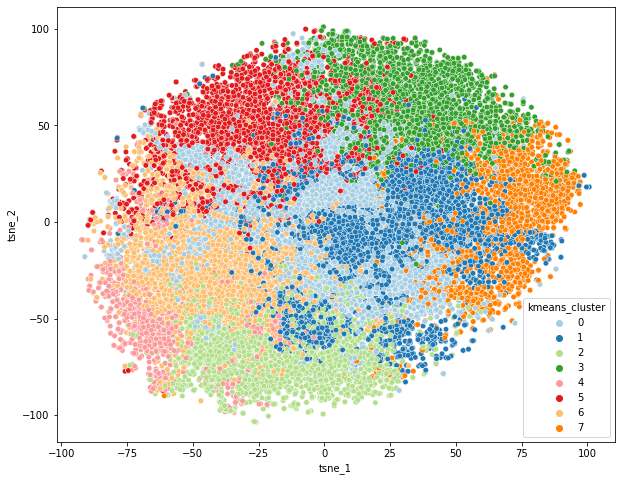

In [153]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= 'tsne_1', y = 'tsne_2', hue = 'kmeans_cluster', s= 30, palette = 'Paired', data = df)

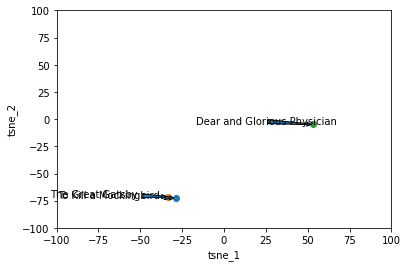

In [154]:
sample_titles = ['To Kill a Mockingbird','The Great Gatsby', 'Dear and Glorious Physician']


for t in sample_titles:
    x=df.loc[df['title']==t,'tsne_1'].tolist()[0]
    y=df.loc[df['title']==t,'tsne_2'].tolist()[0]
    
    plt.scatter(x,y)
    plt.annotate(t,(x,y),xytext=(x-70,y),arrowprops={'arrowstyle':'fancy'})
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')
plt.xlim([-100,100])
plt.ylim([-100,100])
plt.show()


In [155]:
# Let's find two similar books based on similar book column to test the model with similar genres. 

In [156]:
df.loc[df.book_id==10051706, 'title'].values[0]

'Au Revoir, Crazy European Chick (Perry & Gobi, #1)'

In [157]:
df.loc[df.book_id==10051706, 'kmeans_cluster']

19087    2
Name: kmeans_cluster, dtype: int64

In [158]:
df.loc[df.book_id==10327303, 'title'].values[0]

'Uncommon Criminals (Heist Society, #2)'

In [159]:
df.loc[df.book_id==10327303, 'kmeans_cluster']

2314    5
Name: kmeans_cluster, dtype: int64

Samples of books dealing with different themes were assigned to different clusters and lay far from each other in the plot and sample of similar books are in similar clusters.

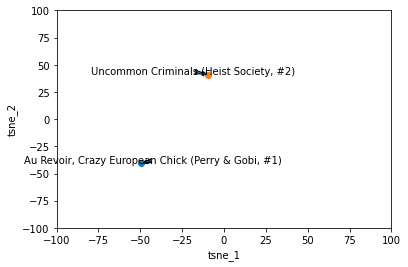

In [160]:
sample_titles = ['Au Revoir, Crazy European Chick (Perry & Gobi, #1)','Uncommon Criminals (Heist Society, #2)']


for t in sample_titles:
    x=df.loc[df['title']==t,'tsne_1'].tolist()[0]
    y=df.loc[df['title']==t,'tsne_2'].tolist()[0]
    
    plt.scatter(x,y)
    plt.annotate(t,(x,y),xytext=(x-70,y),arrowprops={'arrowstyle':'fancy'})
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')
plt.xlim([-100,100])
plt.ylim([-100,100])
plt.show()


In [161]:
df.loc[df.book_id==10051706, 'kmeans_cluster']

19087    2
Name: kmeans_cluster, dtype: int64

In [162]:
df.loc[df.book_id==10051706, 'kmeans_cluster']

19087    2
Name: kmeans_cluster, dtype: int64

It seemes that that cluster 7 and 1 are very close to eachother and therefore our model is performing well.

## KMeans with Optimisation

In [164]:
#Saving the new df
df.to_csv(r'/Users/maryamnozari/Desktop/Springboard/BookRecommendationSystems/ClusterVisualization.csv')